### Preprocessing

In [1]:
!rm -rf nlp_group_project && git clone https://github.com/xinzhuzh/nlp_group_project.git

Cloning into 'nlp_group_project'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 45 (delta 11), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (45/45), done.


In [2]:
%cd nlp_group_project

/content/nlp_group_project


In [3]:
import nltk
nltk.download('punkt') # A popular NLTK sentence tokenizer
nltk.download('stopwords') # library of common English stopwords
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from nltk.corpus import wordnet

from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [4]:
df = pd.read_csv('universal_studio_branches.csv')

In [5]:
!pip install emoji
import emoji

def clean(x):
  #Replace new line escape character
  line = x.replace("\n", "")
  line = line.replace("b'", "")

  #Remove leading/trailing characters and make text lower case
  line  = line.strip().lower()

  #Group numbers together, and extract all numbers including floats from lines_good 
  numbers = re.findall(r'[+-]? *(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?',line)
  line= re.sub(r'[+-]? *(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?','',line)

  #Remove unuseful punctuations
  line= re.sub(r'\'s',' ',line)
  line = re.sub(r'\.|,|:|`|\(|\)|-|"|$|//|&',' ',line)

  #Remove emojis: emojis does not provide additional information based on observation
  line=emoji.get_emoji_regexp().sub("", line)
  return line

     |████████████████████████████████| 170 kB 4.3 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=1ccc07955797c4f7a4f95bda4bf02ebd0b702f5f13a3c801efa4d6901ecd65e7
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [6]:
df['clean_1'] = df['review_text'].apply(clean)

In [7]:
def top_frenquency_words(l):
    words = [] # create a list of all words
    word_count = {} # create a dictionary to store word counts
    for ele in l: # for each line in the novel
        for word in word_tokenize(ele): # for each word in the line
            words.append(word) # add the word to the list of words

            if word not in word_count.keys(): # if the word has not been seen before, add it to the dictionary with initial count of 1
                word_count[word] = 1
            else:
                word_count[word] += 1 # if the word has been seen before, increment its count by 1
    word_count_df = pd.DataFrame(columns=["word", "frequency"]) # create a dataframe with two columns, word and frequency

    word_count_df["word"] = list(word_count.keys())
    word_count_df["frequency"] = list(word_count.values())

    count=word_count_df.sort_values(by='frequency',ascending=False)
    new_list=list(count['word'][:100])
    
    return new_list

In [8]:
import spacy
spacy.cli.download("en_core_web_lg")
import en_core_web_lg
nlp = spacy.load("en_core_web_lg", disable=[ "parser", "ner" ,"attribute_ruler"])

#identify stopwords
stopwords = nlp.Defaults.stop_words
noremove = ['not', 'nor', "n't", 'n‘t','n’t', 'first', 'least', 'top', 'neither', 'many', 'name', 'bottom', 'next', 'last', 'rather', 'amount' ]
stopwords = [word for word in stopwords if word not in noremove]

l=top_frenquency_words(df['clean_1'])
print('top 100 most frequent words from reviews:', l)#Identify stopwords: we should remove stopwords

#Manually check the top 100 most frequent words from good reviews to see which words need to be removed
useful_list=['rides','park','parks','ride','pass','kids','day','each','time','once','down','attraction','universal','studio','studios','wait','like','great','people','line','visit','good','potter','harry','express','pa','fun','more','ticket','place','show','queue','long','attaction','love','kid','enjoy','food','lot','see','experience','worth','hour','back','buy','minute','no','year','transformer','disney','fun','experience''not', 'nor', "n't", 'n‘t','n’t']
mylist = [ele for ele in l if ele not in useful_list]
mylist = mylist + ["'re","'ve", "'m","'d","'ll"]
myset=set(mylist)

stopword=set(stopwords).union(myset)
print('Customized stopwords:',stopword)
#len(stopword)

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')
top 100 most frequent words from reviews: ['the', 'and', 'to', 'a', 'of', 'we', 'it', 'you', 'for', 'was', 'in', 'is', 'i', '!', 'rides', 'park', 'ride', 'are', 'but', 'on', 'that', 'at', 'were', 'not', 'with', 'as', 'universal', 'there', 'this', 'so', 'have', 'day', 'all', 'time', 'if', 'do', "n't", 'my', 'had', 'be', 'get', 'they', 'great', 'one', 'go', 'very', 'harry', 'can', 'potter', 'pass', 'express', 'our', 'your', 'just', 'would', 'which', 'fun', 'good', 'an', 'more', 'did', 'from', 'wait', 'or', 'will', 'like', 'studios', 'really', 'out', 'some', 'only', 'went', 'parks', 'much', 'when', 'food', 'long', 'place', 'also', 'visit', 'kids', 'up', '$', 'worth', 'line', 'than', 'back', 'us', 'well', '’', 'no', 'experience', 'see', 'even', 'too', 'disney', 'people', 'about', 'here', 'most']
Customized stopwords: {'him', 'on', 'seemed', 'along', 'back', 'fifteen', 'regarding', 'across', '

In [9]:
## Spacy Tokenize + Lemma
def spacy_nlp_tokenize(line):
  tokenized = nlp(line)
  cleaned = " ".join([token.lemma_ for token in tokenized if token.text not in stopwords])
  return cleaned
  
df['clean_2'] = df['clean_1'].apply(spacy_nlp_tokenize)

In [10]:
## Find Collocation
doc=[]
for line in df['clean_2']:
  word=word_tokenize(line)
  doc.append(word)

collocation_finder = BigramCollocationFinder.from_documents(doc)
measures = BigramAssocMeasures()
collocation_finder.nbest(measures.raw_freq, 15)

[('harry', 'potter'),
 ('!', '!'),
 ('express', 'pass'),
 ('universal', 'studio'),
 ('roller', 'coaster'),
 ('theme', 'park'),
 ('island', 'adventure'),
 ('wait', 'time'),
 ('fast', 'pass'),
 ('universal', 'studios'),
 ('ride', 'not'),
 ('transformer', 'ride'),
 ('diagon', 'alley'),
 ('jurassic', 'park'),
 ('visit', 'universal')]

In [11]:
def final_clean(x):
  #Some regex cleaning and substitution
  #Those were found by the collocation results below (did not include any plural since this step will be done after lemmatization)
  line=re.sub(r'\b(universal\sstudio)\b|\b(universal)\b', 'UNIVERSAL_TOKEN',x)
  line=re.sub(r'\bu\b', 'you',line)
  line=re.sub(r'\bharry\spotter\b', 'HP_TOKEN',line)
  line=re.sub(r'\broller\scoaster\b', 'ROLLERCOASTER_TOKEN',line)
  line=re.sub(r'\btheme\spark\b', 'THEMEPARK_TOKEN',line)
  line=re.sub(r'\bdiagon\svalley\b', 'DIAGONVALLEY_TOKEN',line)
  line=re.sub(r'\bjurassic\spark\b', 'JURASSICPARK_TOKEN',line)
  line=re.sub(r'\b(express\spass)\b|\b(express\spa)\b', 'EXPRESSPASS_TOKEN',line)
  line=re.sub(r'\b((fast|quick)(\s)?(pass)(?:s)?)\b', 'EXPRESSPASS_TOKEN',line)
  line=re.sub(r'\byear\sold\b', 'YEAROLD_TOKEN',line)
  line=re.sub(r'\b(disney(\s)?(land|world|park)(?:s)?)\b|\b(disney(?:s)?)\b', 'DISNEY_TOKEN',line)
  
  ## Remove some non-useful spacy lemma and tokenize results such as puntuations and -PRON-.
  line = re.sub(r"\’|\*|\'|\/|\!|\+|\;" , "" , line)
  line = re.sub(r'.PRON.', "", line)
  ## Remove extra white space
  line = re.sub(r'\s{2,}', ' ', line)
  return line

In [12]:
df['cleaned_doc'] = df['clean_2'].apply(final_clean)

In [13]:
clean_doc = df['cleaned_doc']

### Topic Modeling

In [14]:
review_corpus=df['clean_1'].copy()
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

# mutiple ngram ranges are tried, bigrams have the best result 

vectorizer = TfidfVectorizer(ngram_range=(2,2),
                             min_df=0.01, max_df=0.4, stop_words="english")

# vectorizer = TfidfVectorizer(ngram_range=(2,3),
#                              min_df=0.01, max_df=0.4, stop_words="english")

# vectorizer = TfidfVectorizer(ngram_range=(3,3),
#                              min_df=0.01, max_df=0.4, stop_words="english")


X_review, review_terms = vectorizer.fit_transform(review_corpus), vectorizer.get_feature_names_out()

review_tf_idf = pd.DataFrame(X_review.toarray(), columns=review_terms)

print(f"Reviews TF-IDF: {review_tf_idf.shape}")
review_tf_idf.head(5)

Reviews TF-IDF: (50904, 164)


,able ride,amusement park,battlestar galactica,best ride,best rides,butter beer,buy express,buy tickets,city walk,customer service,day park,day pass,day universal,day went,definitely worth,diagon alley,disney parks,disney world,don miss,don want,end day,enjoy rides,escape gringotts,express pass,express passes,express ticket,express tickets,far away,far far,fast furious,fast pass,fast passes,feel like,felt like,food drinks,forbidden journey,fun day,fun rides,good rides,good time,...,studios islands,studios singapore,theme park,theme parks,thrill rides,tickets online,time rides,time universal,time visit,time year,transformer ride,transformers mummy,transformers ride,universal islands,universal orlando,universal parks,universal studio,universal studios,visit universal,visited universal,wait line,wait long,wait minutes,wait time,wait times,waiting line,waiting time,waiting times,waste time,water rides,water world,went universal,wizarding world,world harry,worth money,worth visit,worth wait,year old,years ago,young children
0,0.0,0.0,0.0,0.0,0.0,0.291785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.534747,0.241947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305992,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.286502,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.298951,0.0,0.0,0.0,0.0,0.0,0.53209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.612101,0.0,0.0,0.0


In [15]:
nmf = NMF(n_components=5)
W_review = nmf.fit_transform(X_review)
H_review = nmf.components_
print(f"Original shape of X reviews is {X_review.shape}")
print(f"Decomposed W reviews matrix is {W_review.shape}")
print(f"Decomposed H reviews matrix is {H_review.shape}")

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


Original shape of X reviews is (50904, 164)
Decomposed W reviews matrix is (50904, 5)
Decomposed H reviews matrix is (5, 164)


In [16]:
from typing import List
import numpy as np

def get_top_tf_idf_tokens_for_topic(H: np.array, feature_names: List[str], num_top_tokens: int = 5):
  """
  Uses the H matrix (K components x M original features) to identify for each
  topic the most frequent tokens.
  """
  for topic, vector in enumerate(H):
    print(f"TOPIC {topic}\n")
    total = vector.sum()
    top_scores = vector.argsort()[::-1][:num_top_tokens]
    token_names = list(map(lambda idx: feature_names[idx], top_scores))
    strengths = list(map(lambda idx: vector[idx] / total, top_scores))
    
    for strength, token_name in zip(strengths, token_names):
      print(f"\b{token_name} ({round(strength * 100, 1)}%)\n")
    print(f"=" * 50)

get_top_tf_idf_tokens_for_topic(H_review, review_tf_idf.columns.tolist(), 5)

TOPIC 0

harry potter (27.4%)

potter world (4.7%)

diagon alley (3.2%)

potter ride (2.6%)

islands adventure (2.4%)

TOPIC 1

universal studios (35.9%)

islands adventure (3.6%)

studios singapore (3.2%)

visited universal (2.5%)

visit universal (2.3%)

TOPIC 2

express pass (36.2%)

buy express (4.5%)

express passes (2.7%)

wait times (2.0%)

pass worth (1.9%)

TOPIC 3

theme park (51.4%)

theme parks (3.4%)

jurassic park (1.4%)

park rides (1.3%)

universal studio (1.3%)

TOPIC 4

roller coaster (11.2%)

fast pass (4.6%)

transformers ride (3.6%)

jurassic park (3.5%)

universal studio (3.4%)



In [17]:
import numpy as np
def get_top_documents_for_each_topic(W: np.array, documents: List[str], num_docs: int = 5):
  sorted_docs = W.argsort(axis=0)[::-1]
  top_docs = sorted_docs[:num_docs].T
  per_document_totals = W.sum(axis=1)
  for topic, top_documents_for_topic in enumerate(top_docs):
    print(f"Topic {topic}")
    for doc in top_documents_for_topic:
      score = W[doc][topic]
      percent_about_topic = round(score / per_document_totals[doc] * 100, 1)
      print(f"{percent_about_topic}%", documents[doc])
    print("=" * 50)

In [18]:
get_top_documents_for_each_topic(W_review, review_corpus)

Topic 0
100.0% we went for the day to do harry potter  stayed for hhn  it was amazing  scary and everything in between  
100.0% universal has its usual charm but i felt had lost some of its character losing some of the old rides  they have made way for harry potter which is great but i loved the old jaws ride 
100.0% as i was carrying a large black harry potter merchandise bag around on our visit a few weeks ago  i happened to notice that the black was coming off on my skin whenever i touched it  it was all over my hands and arms  a small point  perhaps  but annoying  we had a small bag also  but didn't notice the problem with that one  
100.0% although most of spoken in japanese  my children enjoyed the park we went in week day  when we arrived in morning  it was full of peoples and most of were not japanese  but after aroundpm  most of the ride was not in long waiting  harry potter magic wands were a bit expensive but our children share to use and it was quite fun  i recommend it    

Word2Vec

In [19]:
import spacy
df2=pd.DataFrame()
i=0
for line in clean_doc:
  docvec=nlp(line).vector
  docvec=docvec.tolist()
  df2[i]=docvec
  i+=1
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,50864,50865,50866,50867,50868,50869,50870,50871,50872,50873,50874,50875,50876,50877,50878,50879,50880,50881,50882,50883,50884,50885,50886,50887,50888,50889,50890,50891,50892,50893,50894,50895,50896,50897,50898,50899,50900,50901,50902,50903
0,0.017677,-0.117239,0.034251,0.067304,-0.054664,-0.069441,-0.075678,0.089475,-0.007573,0.006817,0.050589,0.131117,0.086691,0.012728,-0.014655,0.093944,0.133357,-0.169972,0.158461,0.017869,0.017417,0.031265,-0.000712,-0.076132,0.103066,-0.033944,0.068361,-0.009954,-0.078999,0.054186,0.089084,-0.026647,-0.026040,-0.009296,0.086778,-0.025606,0.028103,0.020231,-0.017047,0.014599,...,0.156531,-0.006632,0.028939,0.088635,-0.016539,-0.015416,0.059480,0.107464,0.063826,0.026717,0.022355,-0.028277,0.204508,-0.080775,0.021461,0.194092,0.046564,0.039450,-0.070047,0.218071,0.043919,0.011727,-0.050623,0.042539,0.051402,0.131988,-0.162306,0.039500,0.146548,0.066160,0.013272,0.055855,0.031932,0.001651,-0.012859,-0.005813,0.067983,0.038902,0.083388,0.064496
1,0.084053,0.109914,0.118512,0.115097,0.089734,0.018478,0.077018,0.010381,0.122904,0.112472,0.020590,0.065410,0.076265,0.093610,0.201378,0.134535,0.067958,0.042107,0.200030,0.101765,0.088362,0.102608,0.196545,0.100992,0.128649,0.097901,0.077753,0.089122,0.056794,0.141420,0.142539,0.071635,-0.073978,0.117450,0.069560,0.069094,0.097249,0.070203,0.146300,0.089907,...,0.084413,0.100397,0.082672,0.082494,0.099945,0.107613,0.076029,0.042631,0.105492,0.108732,0.167828,0.063180,0.054486,0.094587,0.105415,0.159727,0.032081,0.113332,0.127057,0.007387,-0.012004,0.188384,0.061433,0.128475,0.032025,0.021010,0.051517,0.045753,0.030329,0.094329,0.067124,0.060021,0.015047,0.169483,0.148652,0.103112,0.068584,0.125337,0.145798,0.117110
2,-0.067586,-0.017582,-0.179654,-0.168772,-0.095373,-0.093177,-0.011025,-0.076332,-0.119962,-0.095509,-0.167004,-0.155291,-0.081224,-0.154947,-0.060713,-0.176096,-0.070820,-0.310797,-0.135030,-0.123760,-0.119215,-0.078394,-0.050349,-0.085225,-0.132143,-0.055354,-0.145745,-0.143347,-0.246435,-0.065506,-0.062545,-0.038103,-0.140808,-0.032443,-0.060713,-0.146656,-0.091283,-0.041304,-0.138181,-0.076841,...,-0.244320,-0.089884,-0.112152,-0.117621,-0.140401,-0.075220,-0.137287,-0.118728,-0.127641,-0.052908,-0.142559,-0.047608,-0.151675,-0.096797,-0.093131,-0.078712,0.011000,-0.040399,-0.165851,-0.031024,0.127916,-0.063862,-0.092989,-0.140133,-0.161369,0.079937,-0.045656,-0.066433,-0.097141,-0.120895,-0.051823,-0.098748,-0.040910,-0.127471,-0.081797,0.003334,-0.112762,-0.120274,-0.064117,-0.023567
3,-0.033349,-0.075436,-0.064257,-0.019580,-0.109951,-0.129638,-0.113861,-0.128251,-0.047223,-0.043420,0.030377,-0.190998,-0.073819,-0.045764,-0.142781,-0.094623,-0.115350,-0.103514,-0.154566,-0.094665,-0.105658,-0.203067,-0.169922,-0.092531,-0.214799,-0.077614,-0.113230,-0.078368,-0.145334,-0.162684,-0.077129,-0.051172,-0.203475,-0.070411,-0.059074,0.006054,-0.110075,-0.096336,-0.057645,-0.103061,...,-0.171439,-0.079913,-0.157182,-0.086347,-0.114691,-0.130911,-0.126472,-0.132769,-0.072805,-0.077224,-0.049972,-0.131759,-0.058472,-0.130242,-0.108925,-0.139697,-0.110235,-0.132128,-0.082944,-0.181167,-0.029422,-0.115834,-0.118506,-0.113392,-0.131287,-0.191659,-0.098482,-0.053042,-0.154206,-0.065448,-0.132937,-0.104594,-0.077038,-0.094548,-0.090785,-0.086393,-0.113226,-0.029738,-0.093307,-0.071839
4,0.090244,0.065781,0.145547,0.123979,0.048972,0.054906,0.155647,0.124642,0.113756,0.105995,0.176554,0.124628,0.154184,0.121400,0.172110,0.211761,0.117017,0.105052,0.148710,0.118644,0.238055,0.187104,0.172739,0.026635,0.194441,0.056333,0.167050,0.024750,0.038509,0.125247,0.135617,0.077943,0.086370,0.232831,0.180453,0.034005,0.125449,-0.032923,0.097726,0.142243,...,0.144535,0.160342,0.186746,0.163194,0.102955,0.047411,0.137810,0.172447,0.052409,0.124567,0.110872,0.117732,0.180218,0.038527,0.129674,0.152856,0.126763,0.062950,0.131577,0.145898,0.237766,0.

Reduce Dimensions using PCA

In [20]:
df2=df2.transpose()
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0.017677,0.084053,-0.067586,-0.033349,0.090244,-0.019172,-0.041876,-0.138608,0.011660,2.102315,-0.193211,0.016460,-0.011354,0.054923,-0.155307,-0.004745,-0.113872,1.016068,-0.080536,-0.018376,-0.022825,0.081615,-0.039932,-0.040215,0.032938,-0.028759,-0.068556,-0.137824,0.111053,-0.020089,0.009743,-0.019062,-0.078476,0.005938,-0.041960,0.034209,0.014137,0.042783,-0.010297,0.090394,...,0.121040,0.166212,0.039288,-0.042635,0.049401,-0.106767,0.030728,0.139099,0.201233,0.034971,0.003672,-0.017894,0.040964,-0.109292,0.003850,0.074080,-0.022772,0.006492,0.085743,0.099137,0.008601,-0.020774,-0.026538,0.158464,-0.074501,0.015765,0.091839,-0.068942,0.020869,0.109634,-0.111238,0.030488,0.057806,-0.011645,0.085950,-0.030734,-0.042180,-0.031034,0.013756,0.105648
1,-0.117239,0.109914,-0.017582,-0.075436,0.065781,0.064276,-0.017814,-0.156601,0.103955,2.276595,-0.354952,0.107377,-0.041586,0.007398,-0.091882,-0.139088,-0.103751,1.224195,-0.109082,0.086111,0.046376,-0.079118,-0.072689,-0.165616,0.030558,0.001016,-0.053287,-0.174847,0.101345,-0.032590,0.094043,-0.158033,0.086033,0.006665,-0.083121,0.141643,0.065367,0.030830,-0.059271,0.048102,...,0.021828,0.114719,-0.041528,-0.033241,0.035763,-0.070003,0.069245,0.071060,0.344459,-0.047957,-0.008718,-0.105020,-0.015818,-0.078752,-0.102529,0.195491,-0.075363,0.081293,0.167902,0.230588,0.054654,0.014295,-0.039371,0.050772,-0.114961,-0.032027,0.129638,-0.057465,0.059806,0.051028,-0.147780,0.202306,0.021876,0.032092,0.145490,0.013113,0.013854,-0.046442,0.032150,0.187532
2,0.034251,0.118512,-0.179654,-0.064257,0.145547,0.060556,0.047213,-0.119856,0.013336,2.211530,-0.159365,-0.028492,0.032705,0.049051,-0.120890,-0.088894,-0.129441,1.011256,-0.085382,0.017204,-0.009966,-0.026280,0.046119,-0.009291,0.036076,0.045169,-0.058803,-0.164599,0.082943,-0.065481,-0.076137,-0.010844,-0.007910,0.051395,0.005375,0.063026,0.071046,0.021886,-0.105760,-0.092820,...,0.120720,0.102110,0.103239,-0.013448,0.124085,-0.066083,0.086537,0.154661,0.361784,0.115541,-0.054452,0.006177,-0.040695,-0.192241,-0.056700,0.056507,0.012460,0.025383,0.038008,0.120118,0.014841,0.022319,0.057085,0.031030,-0.067464,-0.044004,0.058773,-0.037487,0.109732,0.044437,-0.136455,0.066880,-0.053473,-0.058167,0.108306,-0.013469,-0.039823,-0.080099,0.011074,0.063684
3,0.067304,0.115097,-0.168772,-0.019580,0.123979,-0.019728,-0.091161,-0.086646,-0.093400,2.149604,-0.184107,0.136190,-0.009050,0.091756,-0.189138,-0.050547,-0.077654,1.225979,-0.064631,-0.017986,-0.003838,-0.025303,0.008663,-0.022610,0.039950,0.081937,-0.004396,-0.159417,0.050265,-0.075080,-0.015672,-0.023064,-0.063970,0.038717,0.065940,0.022641,0.005596,0.027834,-0.046347,-0.200115,...,0.016498,0.165695,0.068247,0.034007,0.137246,-0.090659,-0.030617,0.241232,0.318942,0.055932,0.252133,0.009892,-0.065279,-0.135224,-0.049374,0.134007,0.105467,0.136430,0.032442,0.040737,-0.131934,0.040376,0.040367,0.101326,-0.129802,-0.034519,0.058310,0.000738,0.184553,0.025966,-0.180483,0.093633,0.005987,-0.268292,0.023066,-0.023379,0.009051,0.003145,0.149084,0.067276
4,-0.054664,0.089734,-0.095373,-0.109951,0.048972,0.040187,0.034222,-0.199791,0.079634,1.730786,-0.193900,0.038168,0.099753,0.033372,-0.103542,-0.090823,-0.083540,0.865945,-0.122322,0.087082,0.066273,-0.003705,0.096245,-0.100980,-0.130086,0.069866,-0.133304,-0.226782,0.139544,-0.028572,-0.061054,-0.000730,0.017681,0.145808,-0.104673,0.039450,0.141583,0.103114,-0.037116,0.045650,...,0.146409,0.091828,0.085271,0.039228,0.053083,-0.119882,0.045508,0.150164,0.268985,0.173199,-0.117046,-0.034309,-0.030351,-0.112757,-0.089555,0.094365,-0.044029,-0.047551,-0.045300,0.153898,-0.014589,-0.106970,-0.056919,0.070384,0.004118,0.017332,0.106183,-0.127327,0.021876,-0.027835,-0.126079

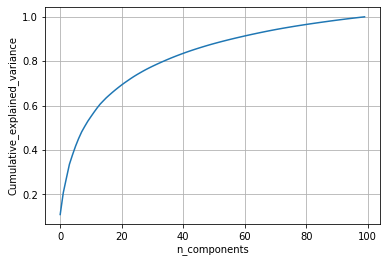

In [21]:
#To find the appropriate dimensionality, I plotted the cumulative_explained_variance out and then make the decide for final dimension#.
#From the graph, we choose n_components=40 since the culmulative explained variance is over 80%

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
pca_cv = PCA(n_components=100)
X_cv = pca_cv.fit_transform(df2)

percentage_var_explained = pca_cv.explained_variance_ / np.sum(pca_cv.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(1, figsize=(6,4))

plt.clf()
plt.plot(cum_var_explained)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [22]:
pca_cv = PCA(n_components=40)

X_cv = pca_cv.fit_transform(df2)

new_df=pd.DataFrame(X_cv)
new_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-0.624393,0.220778,-0.070917,0.072375,-0.044836,0.035151,0.162947,-0.097192,-0.059338,0.050584,-0.093354,0.014746,-0.076555,0.181637,-0.004900,-0.161088,-0.005096,-0.065709,-0.051739,-0.090188,0.037509,0.019662,0.033419,-0.049057,-0.037744,-0.063231,-0.099693,0.014885,-0.017953,-0.011384,0.004601,-0.164864,-0.027564,0.074255,0.030135,-0.039238,0.038249,0.021236,0.062450,0.088011
1,-0.950009,-0.044819,0.262640,-0.243984,0.010586,0.118611,-0.242788,-0.214690,0.006679,0.071252,-0.082364,0.044599,0.241939,0.096041,-0.257129,-0.276193,0.136251,-0.271539,0.148222,-0.281733,0.101782,0.082222,-0.016876,0.149176,0.122113,0.114976,-0.030068,0.053229,0.241422,0.184533,0.082240,-0.072080,-0.096611,0.207433,0.036709,0.033181,-0.019300,0.013887,0.100235,-0.085426
2,-0.518109,-0.040704,-0.127662,-0.330377,-0.083232,-0.307576,0.200773,-0.000029,-0.156214,0.082429,-0.010855,-0.079461,0.016507,0.046882,-0.048944,-0.035615,0.031053,-0.033427,0.053005,0.038555,0.139979,-0.087235,0.049821,0.032737,-0.005281,-0.041713,-0.050719,-0.000075,0.039900,-0.036849,-0.004759,-0.112186,0.002448,0.052701,0.018675,-0.046898,-0.014821,-0.014356,0.017525,-0.015487
3,-0.649519,0.085717,-0.382712,0.017545,0.295394,-0.476372,0.363360,-0.000163,0.082499,0.069877,-0.183417,-0.236610,-0.064534,-0.175799,-0.138706,-0.084637,-0.067185,0.075608,-0.007515,0.041327,-0.015170,-0.130922,0.194026,0.071226,0.141926,-0.063800,0.032352,0.003555,0.040463,0.040957,-0.165815,-0.048597,0.027283,0.063417,0.007930,0.053441,0.010297,-0.073065,-0.072829,-0.025482
4,-0.112017,0.216322,-0.280796,-0.335604,-0.193839,0.238404,-0.179787,0.298017,-0.377261,-0.132877,0.076827,0.142916,0.079674,-0.042696,0.063225,-0.129794,0.053045,-0.065518,0.107103,0.086121,0.155957,0.170242,0.001083,-0.087404,0.014066,-0.016976,0.072984,0.041088,0.039763,0.052353,-0.017636,0.004671,-0.214556,-0.042849,-0.028031,-0.039199,-0.072851,0.100258,-0.102453,0.012431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50899,-0.194447,0.469105,0.400247,0.109144,0.042747,0.079490,-0.070734,-0.063293,0.098604,-0.096731,-0.167424,-0.135749,0.036530,0.121246,-0.142030,0.041803,-0.153710,-0.066329,0.088195,-0.004808,-0.034830,-0.002656,0.016039,0.116780,-0.078515,0.050196,-0.086317,0.049165,-0.036527,0.072370,-0.004491,0.061864,0.025365,-0.016833,0.067374,-0.077090,0.006845,0.008188,0.028173,0.008189
50900,0.395909,0.512910,-0.235909,-0.085029,-0.049087,-0.103338,0.078259,0.000398,-0.000483,-0.037420,0.010256,-0.053152,0.081056,-0.085673,-0.043958,-0.059058,-0.029483,0.062366,-0.047603,-0.002725,0.034644,-0.020759,0.092678,0.040061,0.098419,0.037398,0.037851,0.013054,-0.040580,0.012627,0.010256,0.066014,-0.055930,-0.026177,0.014954,0.069869,0.025838,-0.079691,-0.040160,-0.003606
50901,-0.362644,0.059216,0.161354,-0.118845,-0.154573,-0.081561,0.054599,-0.050604,0.231132,-0.010555,-0.048235,-0.006066,0.035155,0.131762,-0.033491,0.130282,-0.005071,0.059122,0.069668,0.075231,-0.043500,0.008325,-0.000180,0.043313,0.019973,-0.040935,-0.099726,0.009433,0.000556,-0.062498,-0.000889,0.102353,0.076095,-0.001755,-0.029566,-0.060472,-0.004691,-0.100077,0.122559,-0.015481
50902,-0.229463,0.038323,0.307873,0.270765,0.217673,-0.215580,0.016232,-0.144080,0.107719,-0.063079,-0.040085,-0.002716,0.111091,-0.226457,0.027994,-0.039579,0.028725,0.156322,-0.062645,0.119791,-0.086711,0.012228,-0.010699,0.024007,-0.007775,0.029020,-0.117085,-0.011417,-0.045008,-0.000154,0.037619,-0.087981,0.016411,0.031741,0.006594,-0.023117,-0.016591,0.019797,0.037119,0.017864


### Logistic Regression

In [23]:
#Create target sentiments based on ratings

data=pd.read_csv('universal_studio_branches.csv')
for i in range(len(data)):
  if data.loc[i,'rating']<=3:
    data.loc[i,'target']='neg'
  else:
    data.loc[i,'target']='pos'
data


,reviewer,rating,written_date,title,review_text,branch,target
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,neg
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida,neg
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,neg
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida,pos
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,pos
...,...,...,...,...,...,...,...
50899,vinz20,4.0,"March 29, 2010",I'll Be Back Only If ...,This is my first visit to a Universal Studio t...,Universal Studios Singapore,pos
50900,betty l,4.0,"March 29, 2010",Universal Studios Singapore Experience,We finally visited Singapore's very first them...,Universal Studios Singapore,pos
50901,spoonos65,4.0,"March 28, 2010",Impressive but not quite finished!,We visited during the first week of its 'soft ...,Universal Studios Singapore,pos
50902,HeatSeekerWrexham_UK,4.0,"March 22, 2010",Small but beautifully marked,We visited on the 3rd day of the 'soft' openin...,Universal Studios Singapore,pos


In [24]:
new_df['target']=data['target']
new_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,target
0,-0.624393,0.220778,-0.070917,0.072375,-0.044836,0.035151,0.162947,-0.097192,-0.059338,0.050584,-0.093354,0.014746,-0.076555,0.181637,-0.004900,-0.161088,-0.005096,-0.065709,-0.051739,-0.090188,0.037509,0.019662,0.033419,-0.049057,-0.037744,-0.063231,-0.099693,0.014885,-0.017953,-0.011384,0.004601,-0.164864,-0.027564,0.074255,0.030135,-0.039238,0.038249,0.021236,0.062450,0.088011,neg
1,-0.950009,-0.044819,0.262640,-0.243984,0.010586,0.118611,-0.242788,-0.214690,0.006679,0.071252,-0.082364,0.044599,0.241939,0.096041,-0.257129,-0.276193,0.136251,-0.271539,0.148222,-0.281733,0.101782,0.082222,-0.016876,0.149176,0.122113,0.114976,-0.030068,0.053229,0.241422,0.184533,0.082240,-0.072080,-0.096611,0.207433,0.036709,0.033181,-0.019300,0.013887,0.100235,-0.085426,neg
2,-0.518109,-0.040704,-0.127662,-0.330377,-0.083232,-0.307576,0.200773,-0.000029,-0.156214,0.082429,-0.010855,-0.079461,0.016507,0.046882,-0.048944,-0.035615,0.031053,-0.033427,0.053005,0.038555,0.139979,-0.087235,0.049821,0.032737,-0.005281,-0.041713,-0.050719,-0.000075,0.039900,-0.036849,-0.004759,-0.112186,0.002448,0.052701,0.018675,-0.046898,-0.014821,-0.014356,0.017525,-0.015487,neg
3,-0.649519,0.085717,-0.382712,0.017545,0.295394,-0.476372,0.363360,-0.000163,0.082499,0.069877,-0.183417,-0.236610,-0.064534,-0.175799,-0.138706,-0.084637,-0.067185,0.075608,-0.007515,0.041327,-0.015170,-0.130922,0.194026,0.071226,0.141926,-0.063800,0.032352,0.003555,0.040463,0.040957,-0.165815,-0.048597,0.027283,0.063417,0.007930,0.053441,0.010297,-0.073065,-0.072829,-0.025482,pos
4,-0.112017,0.216322,-0.280796,-0.335604,-0.193839,0.238404,-0.179787,0.298017,-0.377261,-0.132877,0.076827,0.142916,0.079674,-0.042696,0.063225,-0.129794,0.053045,-0.065518,0.107103,0.086121,0.155957,0.170242,0.001083,-0.087404,0.014066,-0.016976,0.072984,0.041088,0.039763,0.052353,-0.017636,0.004671,-0.214556,-0.042849,-0.028031,-0.039199,-0.072851,0.100258,-0.102453,0.012431,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50899,-0.194447,0.469105,0.400247,0.109144,0.042747,0.079490,-0.070734,-0.063293,0.098604,-0.096731,-0.167424,-0.135749,0.036530,0.121246,-0.142030,0.041803,-0.153710,-0.066329,0.088195,-0.004808,-0.034830,-0.002656,0.016039,0.116780,-0.078515,0.050196,-0.086317,0.049165,-0.036527,0.072370,-0.004491,0.061864,0.025365,-0.016833,0.067374,-0.077090,0.006845,0.008188,0.028173,0.008189,pos
50900,0.395909,0.512910,-0.235909,-0.085029,-0.049087,-0.103338,0.078259,0.000398,-0.000483,-0.037420,0.010256,-0.053152,0.081056,-0.085673,-0.043958,-0.059058,-0.029483,0.062366,-0.047603,-0.002725,0.034644,-0.020759,0.092678,0.040061,0.098419,0.037398,0.037851,0.013054,-0.040580,0.012627,0.010256,0.066014,-0.055930,-0.026177,0.014954,0.069869,0.025838,-0.079691,-0.040160,-0.003606,pos
50901,-0.362644,0.059216,0.161354,-0.118845,-0.154573,-0.081561,0.054599,-0.050604,0.231132,-0.010555,-0.048235,-0.006066,0.035155,0.131762,-0.033491,0.130282,-0.005071,0.059122,0.069668,0.075231,-0.043500,0.008325,-0.000180,0.043313,0.019973,-0.040935,-0.099726,0.009433,0.000556,-0.062498,-0.000889,0.102353,0.076095,-0.001755,-0.029566,-0.060472,-0.004691,-0.100077,0.122559,-0.015481,pos
50902,-0.229463,0.038323,0.307873,0.270765,0.217673,-0.215580,0.016232,-0.144080,0.107719,-0.063079,-0.040085,-0.002716,0.111091,-0.226457,0.027994,-0.039579,0.028725,0.156322,-0.062645,0.119791,-0.086711,0.012228,-0.010699,0.024007,-0.007775,0.029020,-0.117085,-0.011417,-0.045008,-0.000154,0.037619,-0.087981,0.016411,0.031741,0.006594,-0.023117,-0.016591,0.019797,0.037119,0.017864,pos


In [25]:
# evaluate logistic regression model
# CR to https://machinelearningmastery.com/multinomial-logistic-regression-with-python/
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
y=new_df['target']
X=new_df.drop('target',axis=1)
# define the multinomial logistic regression model
model = LogisticRegression()
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f' % (mean(n_scores)))
print('Mean Rocauc:', (mean(cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1))))

Mean Accuracy: 0.868
Mean Rocauc: 0.8722878130617027


### RNN Classification

In [26]:
import keras
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers.recurrent import SimpleRNN, LSTM
from keras.layers import Flatten, Masking
from scipy.spatial.distance import cosine
from keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


(array([4.8433e+04, 2.0390e+03, 3.1400e+02, 6.7000e+01, 2.3000e+01,
        1.5000e+01, 1.0000e+01, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   3. ,  158.9,  314.8,  470.7,  626.6,  782.5,  938.4, 1094.3,
        1250.2, 1406.1, 1562. ]),
 <a list of 10 Patch objects>)

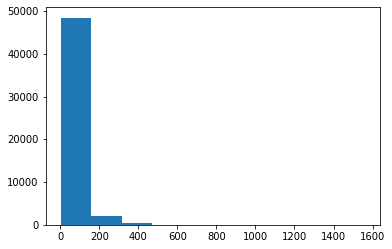

In [27]:
## Creating Classification result as encoder labels. 
## Rating less than or equal 3 are bad reviews, Rating greater than 3 are good reivews
df3 = pd.read_csv('universal_studio_branches.csv')
df3['Label'] = np.nan
df3['Label'].loc[df3['rating'] <= 3] = 0
df3['Label'].loc[df3['rating'] >= 4 ] = 1
labels = df3['Label']
encoder = LabelEncoder()
labels = to_categorical(encoder.fit_transform(labels))


## Tokenzer with Keras
## We choose 7000 words after because its the model accuracy rate with 3000 and 5000
tokenizer = Tokenizer(num_words=7000, oov_token="UNKNOWN_TOKEN")
tokenizer.fit_on_texts(clean_doc)
def integer_encode_documents(docs, tokenizer):
    return tokenizer.texts_to_sequences(docs)
encoded_docs = integer_encode_documents(clean_doc, tokenizer)
import matplotlib.pyplot as plt
plt.hist([len(each) for each in encoded_docs])

In [28]:
## From the hist plot we can see that we most of reviews are less than 300 hundred words in length, so we choose 250 for the max_length of our model.
from keras.preprocessing.sequence import pad_sequences

max_length = 250
padded_docs = pad_sequences(encoded_docs, maxlen= max_length, padding='post')
padded_docs.shape

(50904, 250)

In [29]:
vocab_size = len(tokenizer.word_index) + 1 ## add 1 to account for potential unknow tokens. 

In [30]:
!wget https://dso-560-nlp-text-analytics.s3.amazonaws.com/glove6b100dtxt.zip
!unzip glove6b100dtxt.zip 

--2021-12-18 04:07:09--  https://dso-560-nlp-text-analytics.s3.amazonaws.com/glove6b100dtxt.zip
Resolving dso-560-nlp-text-analytics.s3.amazonaws.com (dso-560-nlp-text-analytics.s3.amazonaws.com)... 52.217.101.108
Connecting to dso-560-nlp-text-analytics.s3.amazonaws.com (dso-560-nlp-text-analytics.s3.amazonaws.com)|52.217.101.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137847651 (131M) [application/zip]
Saving to: ‘glove6b100dtxt.zip’

glove6b100dtxt.zip  100%[===================>] 131.46M  52.6MB/s    in 2.5s    

2021-12-18 04:07:11 (52.6 MB/s) - ‘glove6b100dtxt.zip’ saved [137847651/137847651]

Archive:  glove6b100dtxt.zip
  inflating: glove.6B.100d.txt       


In [31]:
## we load the glove vectors as pretrained embedding index
def load_glove_vectors():
    embeddings_index = {}
    with open('glove.6B.100d.txt') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index
embeddings_index = load_glove_vectors()


# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: # check that it is an actual word that we have embeddings for
        embedding_matrix[i] = embedding_vector

In [32]:
from keras.layers.recurrent import SimpleRNN
from keras.layers import Flatten, Masking

# define model
model =  keras.models.Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.add(Masking(mask_value=0.0)) # masking layer, masks any words that don't have an embedding as 0s.
model.add(SimpleRNN(units=3, input_shape=(1, max_length)))
model.add(Dense(16))
model.add(Dense(2, activation='softmax'))
    
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
model.summary()

X_train, X_test, y_train, y_test = train_test_split(padded_docs, labels, test_size=0.1, stratify= labels)
model.fit(X_train, y_train, epochs=10, verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          3444000   
                                                                 
 masking (Masking)           (None, 250, 100)          0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 3)                 312       
                                                                 
 dense (Dense)               (None, 16)                64        
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 3,444,410
Trainable params: 410
Non-trainable params: 3,444,000
_________________________________________________________________


In [33]:
 model.evaluate(X_test, y_test)

160/160 [==============================] - 4s 25ms/step - loss: 0.4036 - accuracy: 0.8232


[0.40362223982810974, 0.8232174515724182]

In [34]:
## Compare result with different max_length and num_words
## This chunk will take more than an hour to run. 

# result = []
# for each_max_length in [ 175, 200, 250]:
#   for num_word_token in [3000, 5000, 7000]:
    
#     tokenizer = Tokenizer(num_words=num_word_token, oov_token="UNKNOWN_TOKEN")
#     tokenizer.fit_on_texts(clean_doc)
#     encoded_docs = integer_encode_documents(clean_doc, tokenizer)
    
#     padded_docs = pad_sequences(encoded_docs, maxlen= each_max_length, padding='post')
#     vocab_size = len(tokenizer.word_index) + 1
#     embedding_matrix = zeros((vocab_size, 100))
#     for word, i in tokenizer.word_index.items():
#       embedding_vector = embeddings_index.get(word)
#       if embedding_vector is not None: # check that it is an actual word that we have embeddings for
#         embedding_matrix[i] = embedding_vector
#     model =  keras.models.Sequential()
#     model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=each_max_length, trainable=False))
#     model.add(Masking(mask_value=0.0)) # masking layer, masks any words that don't have an embedding as 0s.
#     model.add(SimpleRNN(units=3, input_shape=(1, each_max_length)))
#     model.add(Dense(16))
#     model.add(Dense(2, activation='softmax'))
      ## Compile the model
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     X_train, X_test, y_train, y_test = train_test_split(padded_docs, labels, test_size=0.1, stratify= labels)
#     model.fit(X_train, y_train, epochs=30, verbose=0)
#     result.append([ each_max_length, num_word_token, model.evaluate(X_test, y_test)]) 

### TF-IDF

In [35]:
import random
# for review that have ratings, 
# neagtive are those less than 4
# positive are those equal 5
neg_reviews = df[df['rating']<=3]
pos_reviews = df[df['rating']==5]

In [36]:
# randomly select 1000 reviews, and perform several runs toget different result for tfidf
# (for large dataset when memory is not enough)
# random.seed(0)
neg_sample_tfidf = random.sample(list(neg_reviews['cleaned_doc']), 1000)
pos_sample_tfidf = random.sample(list(pos_reviews['cleaned_doc']), 1000)

In [37]:
# for negative reviews
# we tried several N-gram combinations, and found (4,4) makes most sense
vectorizer = TfidfVectorizer(ngram_range=(4,4),
                             max_df=0.4)
X = vectorizer.fit_transform(neg_sample_tfidf)
terms = vectorizer.get_feature_names()
neg_tf_idf = pd.DataFrame(X.toarray().transpose(), index=terms).sum(axis=1)
neg_score = pd.DataFrame(neg_tf_idf, columns=["score"])
neg_score.sort_values(by="score", ascending=False, inplace=True)
neg_score.head(50)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,score
high price line organize,0.577350
price line organize well,0.577350
rollercoaster thing great not,0.577350
new rollercoaster thing great,0.577350
want high price line,0.577350
thing great not island,0.577350
need update ride not,0.500000
not update thing late,0.500000
thing late update cost,0.500000
overpriced park dire need,0.500000


#### For negative reviews: Locating main Issues
After several runs, we locate 3 main issues: 
- Overprice
- Long wait time
- Rude Staff

In [38]:
## overprice
# bag of words(BOW) that we consider as related to the issue
locating_words_overprice = ['ticket overprice compare attraction',
                            'UNIVERSAL_TOKEN underwhelming expensive ride',
                            'like expect ticket overprice',
                            'entrance fee simply ridiculous',
                            'transformer break significant outlay',
                            'overpriced park dire need',
                            'expensive long waiting time',
                            'enjoyd experience instead spend']
# format the BOW to regex altogether
locating_words_overprice_final=[]
for i in range(len(locating_words_overprice)):
    temp = locating_words_overprice[i].split(" ")
    # print(temp)
    # find documents that contain all of the words, in any order
    temp2 = "(?=.* {} )(?=.* {} )(?=.* {} )(?=.* {} )".format(temp[0],temp[1],temp[2],temp[3])
    print(temp2)
    locating_words_overprice_final.append(temp2)

# find reviews that contain any related BOWs
overprice_df = neg_reviews[neg_reviews['cleaned_doc'].str.contains("|".join(locating_words_overprice_final), regex=True)]
overprice_df.head(5)

(?=.* ticket )(?=.* overprice )(?=.* compare )(?=.* attraction )
(?=.* UNIVERSAL_TOKEN )(?=.* underwhelming )(?=.* expensive )(?=.* ride )
(?=.* like )(?=.* expect )(?=.* ticket )(?=.* overprice )
(?=.* entrance )(?=.* fee )(?=.* simply )(?=.* ridiculous )
(?=.* transformer )(?=.* break )(?=.* significant )(?=.* outlay )
(?=.* overpriced )(?=.* park )(?=.* dire )(?=.* need )
(?=.* expensive )(?=.* long )(?=.* waiting )(?=.* time )
(?=.* enjoyd )(?=.* experience )(?=.* instead )(?=.* spend )


,reviewer,rating,written_date,title,review_text,branch,clean_1,clean_2,cleaned_doc
3297,Alice H,3.0,"January 17, 2019",Family Day Universal,Glad we went because it was nice to be with fa...,Universal Studios Florida,glad we went because it was nice to be with fa...,glad go nice family entrance fee simply ridi...,glad go nice family entrance fee simply ridicu...
3598,A W,3.0,"December 12, 2018",Had some fun but disappointing expensive day,I went with my 10 year old daughter for a day ...,Universal Studios Florida,i went with my year old daughter for a day aft...,go year old daughter day spend prior week disn...,go YEAROLD_TOKEN daughter day spend prior week...
8181,jane11292017,1.0,"October 8, 2017",Total arrogance poor value,Early closing end September for Halloween make...,Universal Studios Florida,early closing end september for halloween make...,early closing end september halloween make exp...,early closing end september halloween make exp...
8205,geoffjane2,1.0,"October 5, 2017",Very poor value for money,Got there on 30th Sept 2017 to find park close...,Universal Studios Florida,got there onth sept to find park closed at th...,get onth sept find park close want halloween...,get onth sept find park close want halloween c...
8599,mandymollymoo,2.0,"August 29, 2017",Not a good day out for us,My daughter had been looking forward to our Fl...,Universal Studios Florida,my daughter had been looking forward to our fl...,daughter look forward florida holiday year ask...,daughter look forward florida holiday year ask...


In [39]:
## long wait
locating_words_wait = ['long queue ride UNIVERSAL_TOKEN',
                       'like wait long line',
                       'long waiting time ride',
                       'expensive long waiting time',
                       'queue long small park']
locating_words_wait_final=[]
for i in range(len(locating_words_wait)):
    temp = locating_words_wait[i].split(" ")
    # print(temp)
    temp2 = "(?=.* {} )(?=.* {} )(?=.* {} )(?=.* {} )".format(temp[0],temp[1],temp[2],temp[3])
    print(temp2)
    locating_words_wait_final.append(temp2)

# find reviews that contain any of the BOWs
wait_df = neg_reviews[neg_reviews['cleaned_doc'].str.contains("|".join(locating_words_wait_final), regex=True)]
wait_df.head(5)

(?=.* long )(?=.* queue )(?=.* ride )(?=.* UNIVERSAL_TOKEN )
(?=.* like )(?=.* wait )(?=.* long )(?=.* line )
(?=.* long )(?=.* waiting )(?=.* time )(?=.* ride )
(?=.* expensive )(?=.* long )(?=.* waiting )(?=.* time )
(?=.* queue )(?=.* long )(?=.* small )(?=.* park )


,reviewer,rating,written_date,title,review_text,branch,clean_1,clean_2,cleaned_doc
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,we went to universal over memorial day weekend...,go universal memorial day weekend total train ...,go UNIVERSAL_TOKEN memorial day weekend total ...
5,John,1.0,"May 28, 2021",This is not a vacation,Worst experience I have ever had the rides are...,Universal Studios Florida,worst experience i have ever had the rides are...,bad experience ride outdate place smell like v...,bad experience ride outdate place smell like v...
12,Kate Z,2.0,"May 25, 2021","Crowded, unhelpful staff, and difficult to get...","It’s no Disney, I’ll tell you that much. We ju...",Universal Studios Florida,it’s no disney i’ll tell you that much we ju...,disney tell return day visit universal par...,DISNEY_TOKEN tell return day visit UNIVERSAL_T...
23,DelBueno,2.0,"May 18, 2021",From bad to worse as time goes by.,As Florida residents we've been to both univer...,Universal Studios Florida,as florida residents we've been to both univer...,florida resident universal park many time year...,florida resident UNIVERSAL_TOKEN park many tim...
52,Casey H,1.0,"April 28, 2021",Not worth the stress or the money. Go to Disne...,TLDR; They don’t observe or enforce Covid safe...,Universal Studios Florida,tldr; they don’t observe or enforce covid safe...,tldr ; not observe enforce covid safety precau...,tldr not observe enforce covid safety precauti...


In [40]:
## rude staff
locating_words_staff = ['park staff negative rude',
                        'negative rude sarcastic impolite',
                        'staff negative rude sarcastic',
                        'park dire need update',
                        'grumpy face rude staff']
locating_words_staff_final=[]
for i in range(len(locating_words_staff)):
    temp = locating_words_staff[i].split(" ")
    # print(temp)
    temp2 = "(?=.* {} )(?=.* {} )(?=.* {} )(?=.* {} )".format(temp[0],temp[1],temp[2],temp[3])
    print(temp2)
    locating_words_staff_final.append(temp2)

staff_df = neg_reviews[neg_reviews['cleaned_doc'].str.contains("|".join(locating_words_staff_final), regex=True)]
staff_df.head(5)

(?=.* park )(?=.* staff )(?=.* negative )(?=.* rude )
(?=.* negative )(?=.* rude )(?=.* sarcastic )(?=.* impolite )
(?=.* staff )(?=.* negative )(?=.* rude )(?=.* sarcastic )
(?=.* park )(?=.* dire )(?=.* need )(?=.* update )
(?=.* grumpy )(?=.* face )(?=.* rude )(?=.* staff )


,reviewer,rating,written_date,title,review_text,branch,clean_1,clean_2,cleaned_doc
195,Josey F,2.0,"February 8, 2021","Go to Disney, don’t waste your money",Pretty much every interaction we had with park...,Universal Studios Florida,pretty much every interaction we had with park...,pretty interaction park staff negative rude ...,pretty interaction park staff negative rude sa...
595,JJ08,1.0,"March 2, 2020",RUDE Employees!,We've been going to Universal Studios Orlando ...,Universal Studios Florida,we've been going to universal studios orlando ...,go universal studios orlando least twice yea...,go UNIVERSAL_TOKEN studios orlando least twice...
8139,bevvi-panda,3.0,"October 11, 2017",Bit disappointed.,This is our first holiday in the USA and we've...,Universal Studios Florida,this is our first holiday in the usa and we've...,first holiday usa save month firstly positiv...,first holiday usa save month firstly positive ...
15370,Dizzeem,3.0,"May 2, 2016",Out of New Ideas and In Dire Need Of A Serious...,Universal Studios and Island of Adventure are ...,Universal Studios Florida,universal studios and island of adventure are ...,universal studios island adventure ok extremel...,UNIVERSAL_TOKEN studios island adventure ok ex...
16472,ElenaMarie,3.0,"February 22, 2016",Needs some updates,Overpriced and most of the park is in dire nee...,Universal Studios Florida,overpriced and most of the park is in dire nee...,overpriced park dire need update ride not,overpriced park dire need update ride not


In [41]:
# # We found some issue related to outdated equipemnt,
# # However, since the reviews related are only a few, we did not include it in the main issue

# # malfuctioned/old equipment
# locating_words_equip = ['transformer break significant outlay',
#                         'dire need update ride',
#                         'overpriced park dire need',
#                         'park dire need update',
#                         'not update thing late']
# locating_words_equip_final=[]
# for i in range(len(locating_words_equip)):
#     temp = locating_words_equip[i].split(" ")
#     # print(temp)
#     temp2 = "(?=.* {} )(?=.* {} )(?=.* {} )(?=.* {} )".format(temp[0],temp[1],temp[2],temp[3])
#     print(temp2)
#     locating_words_equip_final.append(temp2)

# equip_df = neg_reviews[neg_reviews['cleaned_doc'].str.contains("|".join(locating_words_equip_final), regex=True)]
# equip_df.head(5)

In [42]:
## Overview
print('''The data below are repectively:
1. % of the reviews related to the issue among all customer reviews
2. % of the reviews related to the issue among negative customer reviews
3. # of the reviews related to the issue\n''')
# long wait
print("Long wait Issue: "+str(round(len(wait_df)/len(df)*100,3))+"% ("+str(round(len(wait_df)/len(neg_reviews)*100,3))+"%), "+str(len(wait_df)))
# overprice
print("Overprice Issue: "+str(round(len(overprice_df)/len(df)*100,3))+"% ("+str(round(len(overprice_df)/len(neg_reviews)*100,3))+"%), "+str(len(overprice_df)))
# rude staff
print("Rude Staff Issue: "+str(round(len(staff_df)/len(df)*100,3))+"% ("+str(round(len(staff_df)/len(neg_reviews)*100,3))+"%), "+str(len(staff_df)))
# # break/old equipemnt
# print("Equipment Issue: \t"+str(round(len(equip_df)/len(df)*100,3))+"% ("+str(round(len(equip_df)/len(neg_reviews)*100,3))+"%), "+str(len(equip_df)))



The data below are repectively:
1. % of the reviews related to the issue among all customer reviews
2. % of the reviews related to the issue among negative customer reviews
3. # of the reviews related to the issue

Long wait Issue: 1.454% (8.054%), 740
Overprice Issue: 0.086% (0.479%), 44
Rude Staff Issue: 0.018% (0.098%), 9


#### For Positive reviews: Locating main Highlights
After several runs, we locate 3 main highlights: 
- Horror Night
- Entertainments
- Food and Hotel

In [43]:
## horror night
# bag of words(BOW) that we consider as related to the topic
locating_words_horrornight = ['visit halloween horror night',
                            'halloween horror night october']
# format the BOW to regex altogether
locating_words_horrornight_final=[]
for i in range(len(locating_words_horrornight)):
    temp = locating_words_horrornight[i].split(" ")
    # print(temp)
    # find documents that contain all of the words, in any order
    temp2 = "(?=.* {} )(?=.* {} )(?=.* {} )(?=.* {} )".format(temp[0],temp[1],temp[2],temp[3])
    print(temp2)
    locating_words_horrornight_final.append(temp2)

# find reviews that contain either BOW for horror night
horror_df = pos_reviews[pos_reviews['cleaned_doc'].str.contains("|".join(locating_words_horrornight_final), regex=True)]
horror_df.head(5)

(?=.* visit )(?=.* halloween )(?=.* horror )(?=.* night )
(?=.* halloween )(?=.* horror )(?=.* night )(?=.* october )


,reviewer,rating,written_date,title,review_text,branch,clean_1,clean_2,cleaned_doc
498,Mr_themeparkfan,5.0,"May 23, 2020",A highlight of an Orlando holiday!,I asked my partner for adjectives to quickly d...,Universal Studios Florida,i asked my partner for adjectives to quickly d...,ask partner adjective quickly describe experie...,ask partner adjective quickly describe experie...
661,lilabet182,5.0,"February 19, 2020",Halloween!!!,I last visited 6 years ago so it was very diff...,Universal Studios Florida,i last visited years ago so it was very differ...,last visit year ago different fiance not maj...,last visit year ago different fiance not major...
747,Kaygiova,5.0,"January 30, 2020",FUN,Have been here a few times a really great park...,Universal Studios Florida,have been here a few times a really great park...,time great park visit orlando lot plenty resta...,time great park visit orlando lot plenty resta...
1077,Jeffreymol,5.0,"November 18, 2019",Universal Studios & Halloween,"Oh my, oh my, Where do I have to start! We spe...",Universal Studios Florida,oh my oh my where do i have to start! we spe...,oh oh start ! spend holiday netherlands un...,oh oh start spend holiday netherlands UNIVERSA...
1135,Carlos Lopez,5.0,"November 6, 2019",Day & Night Experience.,I was able to visit at day for normal attracti...,Universal Studios Florida,i was able to visit at day for normal attracti...,able visit day normal attraction night hallowe...,able visit day normal attraction night hallowe...


In [44]:
## Popular Entertainments
# bag of words(BOW) that we consider as related to the topic
locating_words_entertain = ['hollywood rip ride rockit',
                            'man black alien attack',
                           'hogwarts express island adventure',
                           'park universal_toekn island adventure'
                           'transformerride_token revenge mummy ride',
                           'universal_toekn island adventure worth',
                           "love universal_toekn island adventure"]
# format the BOW to regex altogether
locating_words_entertain_final=[]
for i in range(len(locating_words_entertain)):
    temp = locating_words_entertain[i].split(" ")
    # print(temp)
    # find documents that contain all of the words, in any order
    temp2 = "(?=.* {} )(?=.* {} )(?=.* {} )(?=.* {} )".format(temp[0],temp[1],temp[2],temp[3])
    print(temp2)
    locating_words_entertain_final.append(temp2)

entertain_df = pos_reviews[pos_reviews['cleaned_doc'].str.contains("|".join(locating_words_entertain_final), regex=True)]
entertain_df

(?=.* hollywood )(?=.* rip )(?=.* ride )(?=.* rockit )
(?=.* man )(?=.* black )(?=.* alien )(?=.* attack )
(?=.* hogwarts )(?=.* express )(?=.* island )(?=.* adventure )
(?=.* park )(?=.* universal_toekn )(?=.* island )(?=.* adventuretransformerride_token )
(?=.* universal_toekn )(?=.* island )(?=.* adventure )(?=.* worth )
(?=.* love )(?=.* universal_toekn )(?=.* island )(?=.* adventure )


,reviewer,rating,written_date,title,review_text,branch,clean_1,clean_2,cleaned_doc
107,rtraveler2004,5.0,"April 3, 2021",Out of this world theming and top quality attr...,This was my first visit back to Universal Orla...,Universal Studios Florida,this was my first visit back to universal orla...,first visit universal orlando year last visit ...,first visit UNIVERSAL_TOKEN orlando year last ...
169,Ulyana,5.0,"March 3, 2021",Adorable place to spend whole day,We spent full working day in Universal studio....,Universal Studios Florida,we spent full working day in universal studio ...,spend working day universal studio recommend...,spend working day UNIVERSAL_TOKEN recommendati...
311,Vacation48202496944,5.0,"November 15, 2020",An amazing resort with 2 stunning theme parks.,Going to Disney in Orlando is a confusing and ...,Universal Studios Florida,going to disney in orlando is a confusing and ...,go disney orlando confusing problematic affair...,go DISNEY_TOKEN orlando confusing problematic ...
367,peachidonut,5.0,"October 1, 2020",The staff makes this place awesome!,The staff working here makes this theme park a...,Universal Studios Florida,the staff working here makes this theme park a...,staff work make theme park amazing ! ! good th...,staff work make THEMEPARK_TOKEN amazing good T...
678,Traveler649545,5.0,"February 15, 2020",Great Rides!!,Our group of 10 enjoyed all the Universal Stud...,Universal Studios Florida,our group of enjoyed all the universal studios...,group enjoy universal studio ride favorite d...,group enjoy UNIVERSAL_TOKEN ride favorite desp...
...,...,...,...,...,...,...,...,...,...
30271,tippANDbb,5.0,"March 10, 2009",BB and Tipp's adventure to Universal.,We always come to Orlando and ALWAYS visit Uni...,Universal Studios Florida,we always come to orlando and always visit uni...,come orlando visit universal studio fun fa...,come orlando visit UNIVERSAL_TOKEN fun family ...
30497,Trish J,5.0,"April 15, 2006","Loved it, Loved It, LOVED IT!!!",NOTE - to enjoy Universal/Islands of Adventure...,Universal Studios Florida,note to enjoy universal/islands of adventure...,note enjoy universal / island adventure e...,note enjoy UNIVERSAL_TOKEN island adventure EX...
30555,Journey19985,5.0,"January 3, 2005",Vacation From The Ordinary,I think these parks (Universal Studios and Isl...,Universal Studios Florida,i think these parks universal studios and isl...,think park universal studio island adventure...,think park UNIVERSAL_TOKEN island adventure go...
30568,GlobeTrotting20250,5.0,"September 25, 2004",Best Movie Theme Park In The World!,"Universal Studios Florida is without a doubt, ...",Universal Studios Florida,universal studios florida is without a doubt ...,universal studios florida doubt good movie t...,UNIVERSAL_TOKEN studios florida doubt good mov...


In [45]:
## Popular Hotel and Food
# bag of words(BOW) that we consider as related to the topic
locating_words_stay = ['stay hard rock hotel',
                        'good food great atmosphere',
                      'park clean staff friendly']
# format the BOW to regex altogether
locating_words_stay_final =[]
for i in range(len(locating_words_stay)):
    temp = locating_words_stay[i].split(" ")
    # print(temp)
    # find documents that contain all of the words, in any order
    temp2 = "(?=.* {} )(?=.* {} )(?=.* {} )(?=.* {} )".format(temp[0],temp[1],temp[2],temp[3])
    print(temp2)
    locating_words_stay_final.append(temp2)

stay_df = pos_reviews[pos_reviews['cleaned_doc'].str.contains("|".join(locating_words_stay_final), regex=True)]
stay_df


(?=.* stay )(?=.* hard )(?=.* rock )(?=.* hotel )
(?=.* good )(?=.* food )(?=.* great )(?=.* atmosphere )
(?=.* park )(?=.* clean )(?=.* staff )(?=.* friendly )


,reviewer,rating,written_date,title,review_text,branch,clean_1,clean_2,cleaned_doc
119,James M,5.0,"March 30, 2021",Get the express pass,I was very happy with our time at Universal. W...,Universal Studios Florida,i was very happy with our time at universal w...,happy time universal unlimited express pass ...,happy time UNIVERSAL_TOKEN unlimited EXPRESSPA...
163,Stephanne,5.0,"March 10, 2021",Flawless fun,I've been to a few theme/amusement parks since...,Universal Studios Florida,i've been to a few theme/amusement parks since...,theme / amusement park pandemic uo right o...,theme amusement park pandemic uo right obvious...
221,Keri A,5.0,"January 16, 2021",Fun and More Fun!,The parks were clean and employees are obvious...,Universal Studios Florida,the parks were clean and employees are obvious...,park clean employee obviously try safe people ...,park clean employee obviously try safe people ...
237,debradefreyn,5.0,"January 4, 2021",Awesome time (again),We absolutely love Universal Orlando and come ...,Universal Studios Florida,we absolutely love universal orlando and come ...,absolutely love universal orlando come way was...,absolutely love UNIVERSAL_TOKEN orlando come w...
261,fivekidsohmy1,5.0,"December 30, 2020",Safe and wonderful trip!,We came the week before Christmas and had the ...,Universal Studios Florida,we came the week before christmas and had the ...,come week christmas good time ! feel safe ton ...,come week christmas good time feel safe ton sa...
...,...,...,...,...,...,...,...,...,...
49495,Andrew U,5.0,"October 30, 2012",A great day out,Having been to Singapore three times previousl...,Universal Studios Singapore,having been to singapore three times previousl...,have singapore time previously not go uss fina...,have singapore time previously not go uss fina...
49881,msculit,5.0,"July 10, 2012",Fun time at Universal Studios Singapore!,The rain didn't stop me and my daughter from g...,Universal Studios Singapore,the rain didn't stop me and my daughter from g...,rain not stop daughter go ride explore theme r...,rain not stop daughter go ride explore theme r...
49974,Lachlan72,5.0,"June 18, 2012",Great day out for the kids,"I was a bit skeptical about coming here, but i...",Universal Studios Singapore,i was a bit skeptical about coming here but i...,bit skeptical come great day spotlessly cl...,bit skeptical come great day spotlessly clean ...
50575,SweetSA,5.0,"October 14, 2011","Great fun, we all loved it.",We visited late morning on a Monday. Caught Ta...,Universal Studios Singapore,we visited late morning on a monday caught ta...,visit late morning monday catch taxi vivo ci...,visit late morning monday catch taxi vivo city...


In [46]:
## Over view
print('''The data below are repectively:
1. % of the reviews related to the topics among all positive customer reviews
2. % of the reviews related to the topics among positive customer reviews
3. # of the reviews related to the topic\n''')
# overprice
print("Horror Night Topics: "+str(round(len(horror_df)/len(df)*100,3))+"% ("+str(round(len(horror_df)/len(pos_reviews)*100,3))+"%), "+str(len(horror_df)))
# long wait
print("Popular Entertainments Topics: "+str(round(len(entertain_df)/len(df)*100,3))+"% ("+str(round(len(entertain_df)/len(pos_reviews)*100,3))+"%), "+str(len(entertain_df)))
# rude staff
print("Stay annd Food Topics: "+str(round(len(stay_df)/len(df)*100,3))+"% ("+str(round(len(stay_df)/len(pos_reviews)*100,3))+"%), "+str(len(stay_df)))


The data below are repectively:
1. % of the reviews related to the topics among all positive customer reviews
2. % of the reviews related to the topics among positive customer reviews
3. # of the reviews related to the topic

Horror Night Topics: 0.383% (0.691%), 195
Popular Entertainments Topics: 1.151% (2.078%), 586
Stay annd Food Topics: 0.756% (1.365%), 385
